In [317]:

import pandas as pd
import numpy as np

from scipy import stats

import os 

os.chdir("/home/ptruong/git/dia_sum/scripts/PXD002952")

from q_value import qvalues
from triqler_output_to_df import  parse_triqler
#os.chdir("/hdd_14T/data/PXD002952/osw_res_20210303/hye124/ttof6600/32fix/full_ts_v")

os.chdir("/hdd_14T/data/PXD002952/20210614_dataset/diaumpire_spectral_lib_20210706/MSFragger_20210707/diann_20210811")


In [318]:

# filename has different formatting, we need to change number or implement regex.
experiment_id_mapper = lambda x: x.split("_")[5]
sample_id_mapper = lambda x: x.split("_")[8] #hye124 
specie_mapper = lambda x: x.split("_")[-1]

def read_in_and_filter(filename, m_score_treshold = 0.01):  
    print(filename)
    df = pd.read_csv(filename, sep = "\t")
    df = df[df.decoy != 1]
    df = df[df.m_score < m_score_treshold] # filter away crap, so all values should be good... we take average of top3 here
    print(str(len(df)) + " significantly identified peptides at " + str(m_score_treshold) + " FDR-treshold.")
    print("")
    df["experiment_id"] = df["filename"].map(experiment_id_mapper)
    df["sample_id"] = df["filename"].map(sample_id_mapper)
    sample_id = df.sample_id.unique()[0]
    experiment_id = df.experiment_id.unique()[0]     

    #midx = pd.MultiIndex(levels = [[sample_id],[experiment_id]], codes = [[0],[0]], names = ["sample_id", "experiment_id"])
    df["specie"] = df["ProteinName"].map(specie_mapper)
    df = df.set_index(["specie", "ProteinName", "FullPeptideName", "sample_id", "experiment_id"])
    df = df[["Intensity"]]
    df = pd.DataFrame(df.values, index = df.index)
    
    return df


In [319]:
os.listdir()

['report.tsv',
 'msstats_run.csv',
 'report.log.txt',
 'sessionInfo.txt',
 'triqler_results',
 'msrobsum_results_msqrobsum.rds',
 'msqrobsum_protein_sum_20210817.csv',
 'report.stats.tsv',
 'msqrobsum_result.csv',
 'report.pg_matrix.tsv',
 'run_triqler.sh',
 'pd.csv',
 'report.pdf',
 'diann_msstats_input.csv',
 'fd.csv',
 'report.gg_matrix.tsv',
 'msstat_output_runleveldata.csv',
 'msstats-2.log',
 'report.unique_genes_matrix.tsv',
 'triqler_input_diann_searchScore_Qvalue.csv',
 'triqler_input_diann_searchScore_Qvalue.csv.pqr.tsv',
 'expr.csv',
 'msstats-1.log',
 'msstat_output_filtered.csv',
 'msstats.log',
 'report.pr_matrix.tsv']

In [320]:
df = pd.read_csv("triqler_input_diann_searchScore_Qvalue.csv", sep = "\t")                      


In [321]:
df

,run,condition,charge,searchScore,intensity,peptide,proteins
0,002-Pedro,1,2,9.825093,791.822144,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
1,003-Pedro,2,2,9.464517,773.533447,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
2,004-Pedro,1,2,9.198167,910.519959,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
3,005-Pedro,2,2,9.486911,860.940491,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
4,006-Pedro,1,2,9.324160,909.658081,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
...,...,...,...,...,...,...,...
217888,005-Pedro,2,2,9.391661,289.798309,YYYIPQYK,Q8N183_HUMAN
217889,006-Pedro,1,2,9.324160,362.397034,YYYIPQYK,Q8N183_HUMAN
217890,007-Pedro,2,2,9.220538,338.117950,YYYIPQYK,Q8N183_HUMAN
217891,004-Pedro,1,4,2.363257,50.300472,YYYKFIKCDADLLESR,DECOY_Q70Z53_HUMAN


In [322]:
x = 0.05
e = -np.log(x)
1/np.e**e

0.05000000000000002

In [323]:
df["q_value"] = 1/np.e**df["searchScore"]

In [324]:
df.q_value.max()

0.8778716326000001

In [325]:
df = df[df["q_value"] < 1.00]

In [326]:
df["intensity"] = np.log2(df["intensity"])

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [327]:
df_means = df.groupby("peptide").mean()

In [328]:
df_stat = pd.DataFrame(df_means.intensity, index = df_means.index, columns = ["mu"])


In [329]:
pd.DataFrame(df_means.intensity)

,intensity
peptide,
AAAAAAAAAAGAAGGR,9.746496
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654
AAAAAAGAASGLPGPVAQGLK,9.313086
AAAAAATAAAAASIR,6.879317
...,...
YYTVFDRDNNR,5.435848
YYVLNFPAR,5.478644
YYVLYLAPENPTGDTTPVGDPVGLGTGNFR,4.375057


In [330]:
df_stat

,mu
peptide,
AAAAAAAAAAGAAGGR,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,NaN
AAAAAAAGDSDSWDADAFSVEDPVRK,NaN
AAAAAAGAASGLPGPVAQGLK,NaN
AAAAAATAAAAASIR,NaN
...,...
YYTVFDRDNNR,NaN
YYVLNFPAR,NaN
YYVLYLAPENPTGDTTPVGDPVGLGTGNFR,NaN


In [331]:
df

,run,condition,charge,searchScore,intensity,peptide,proteins,q_value
0,002-Pedro,1,2,9.825093,9.629033,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000054
1,003-Pedro,2,2,9.464517,9.595320,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000078
2,004-Pedro,1,2,9.198167,9.830547,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000101
3,005-Pedro,2,2,9.486911,9.749770,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000076
4,006-Pedro,1,2,9.324160,9.829181,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000089
...,...,...,...,...,...,...,...,...
217888,005-Pedro,2,2,9.391661,8.178905,YYYIPQYK,Q8N183_HUMAN,0.000083
217889,006-Pedro,1,2,9.324160,8.501427,YYYIPQYK,Q8N183_HUMAN,0.000089
217890,007-Pedro,2,2,9.220538,8.401383,YYYIPQYK,Q8N183_HUMAN,0.000099
217891,004-Pedro,1,4,2.363257,5.652500,YYYKFIKCDADLLESR,DECOY_Q70Z53_HUMAN,0.094113


In [332]:

import matplotlib.pyplot as plt
import seaborn as sns 

def get_peptide_mu_sigma(df):
    df_means = df.groupby("peptide").mean()

    df_stat = pd.DataFrame(df_means.intensity.values, index = df_means.index, columns = ["mu"])
    df_stat["std"] = df.groupby("peptide").std().intensity
    df_stat["std/mu-ratio"] = df_stat["std"] / df_stat["mu"]
    return df_stat

def select_specie_and_sample(df, specie = "HUMAN", sample = "1"):
    return df.iloc[(df.index.get_level_values("specie") == specie) & (df.index.get_level_values("sample_id") == sample), :]

def select_sample(df, sample = "1"):
    return df.iloc[(df.index.get_level_values("sample_id") == sample), :]

In [333]:
df_stat

,mu
peptide,
AAAAAAAAAAGAAGGR,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,NaN
AAAAAAAGDSDSWDADAFSVEDPVRK,NaN
AAAAAAGAASGLPGPVAQGLK,NaN
AAAAAATAAAAASIR,NaN
...,...
YYTVFDRDNNR,NaN
YYVLNFPAR,NaN
YYVLYLAPENPTGDTTPVGDPVGLGTGNFR,NaN


In [334]:
#mu_sig_sample1 = get_peptide_mu_sigma(select_sample(df, sample = "1"))
#mu_sig_sample2 = get_peptide_mu_sigma(select_sample(df, sample = "2"))

#bins = [i*2 for i in range(11)]
#mu_sig_sample1["binned_mu"] = pd.cut(mu_sig_sample1["mu"], bins)
#mu_sig_sample1["quantile_bin_mu"] = pd.qcut(mu_sig_sample1["mu"], q=8)

#mu_sig_sample2["binned_mu"] = pd.cut(mu_sig_sample2["mu"], bins)
#mu_sig_sample2["quantile_bin_mu"] = pd.qcut(mu_sig_sample2["mu"], q=8)

In [335]:
#f, ax = plt.subplots(2, 2, figsize = (17,17))
#sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample1, ax=ax[0,0])
#ax[0,0].set_title("sample1 - std/mu ratio vs binned_mu for log-transformed peptide values")

#sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample2, ax=ax[0,1])
#ax[0,1].set_title("sample2 - std/mu ratio vs binned_mu for log-transformed peptide values")

#sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample1, ax=ax[1,0])
#ax[1,0].set_title("sample1 - std/mu vs quantile_bin_mu for log-transformed peptide values")

#sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample2, ax=ax[1,1])
#ax[1,1].set_title("sample2 - std/mu vs quantile_bin_mu for log-transformed peptide values")


In [336]:
#df["intensity"] = df[0]
#df = df.drop([0], axis = 1)
df_stats = get_peptide_mu_sigma(df).dropna()

In [337]:
df_stats["mu"] 

bins = [i*2 for i in range(11)]
df_stats["binned_mu"] = pd.cut(df_stats["mu"], bins,  include_lowest=True)
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=8)




In [338]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,9.746496,0.101192,0.010382,"(8.0, 10.0]","(8.76, 14.279]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787,0.908112,0.109046,"(8.0, 10.0]","(7.961, 8.76]"
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654,0.092484,0.012010,"(6.0, 8.0]","(7.367, 7.961]"
AAAAAAGAASGLPGPVAQGLK,9.313086,0.091770,0.009854,"(8.0, 10.0]","(8.76, 14.279]"
AAAAAATAAAAASIR,6.879317,0.935400,0.135973,"(6.0, 8.0]","(6.85, 7.367]"
...,...,...,...,...,...
YYTGVVNNNEMVALQR,5.365163,0.463376,0.086368,"(4.0, 6.0]","(4.742, 5.66]"
YYTVFDRDNNR,5.435848,0.201394,0.037049,"(4.0, 6.0]","(4.742, 5.66]"
YYVLNFPAR,5.478644,0.926870,0.169179,"(4.0, 6.0]","(4.742, 5.66]"


In [339]:
df_stats


,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,9.746496,0.101192,0.010382,"(8.0, 10.0]","(8.76, 14.279]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787,0.908112,0.109046,"(8.0, 10.0]","(7.961, 8.76]"
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654,0.092484,0.012010,"(6.0, 8.0]","(7.367, 7.961]"
AAAAAAGAASGLPGPVAQGLK,9.313086,0.091770,0.009854,"(8.0, 10.0]","(8.76, 14.279]"
AAAAAATAAAAASIR,6.879317,0.935400,0.135973,"(6.0, 8.0]","(6.85, 7.367]"
...,...,...,...,...,...
YYTGVVNNNEMVALQR,5.365163,0.463376,0.086368,"(4.0, 6.0]","(4.742, 5.66]"
YYTVFDRDNNR,5.435848,0.201394,0.037049,"(4.0, 6.0]","(4.742, 5.66]"
YYVLNFPAR,5.478644,0.926870,0.169179,"(4.0, 6.0]","(4.742, 5.66]"


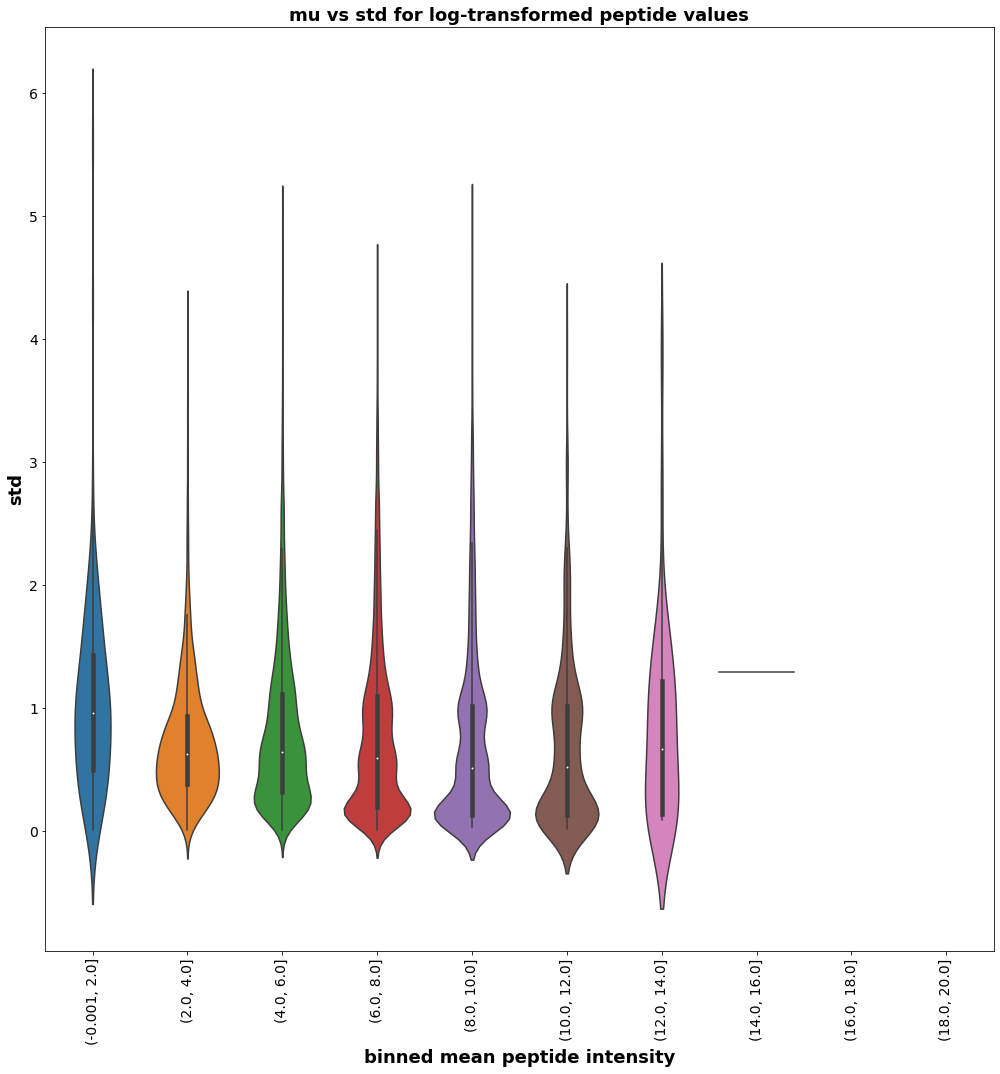

In [340]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)

In [341]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,9.746496,0.101192,0.010382,"(8.0, 10.0]","(8.76, 14.279]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787,0.908112,0.109046,"(8.0, 10.0]","(7.961, 8.76]"
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654,0.092484,0.012010,"(6.0, 8.0]","(7.367, 7.961]"
AAAAAAGAASGLPGPVAQGLK,9.313086,0.091770,0.009854,"(8.0, 10.0]","(8.76, 14.279]"
AAAAAATAAAAASIR,6.879317,0.935400,0.135973,"(6.0, 8.0]","(6.85, 7.367]"
...,...,...,...,...,...
YYTGVVNNNEMVALQR,5.365163,0.463376,0.086368,"(4.0, 6.0]","(4.742, 5.66]"
YYTVFDRDNNR,5.435848,0.201394,0.037049,"(4.0, 6.0]","(4.742, 5.66]"
YYVLNFPAR,5.478644,0.926870,0.169179,"(4.0, 6.0]","(4.742, 5.66]"


# Adjust to remove peptides with missing values in samples

In [342]:
peptides_included_in_all_samples = (df.groupby("peptide").count() >= 6).index

In [343]:
df_filtered = df[df["peptide"].isin(peptides_included_in_all_samples)]

In [344]:
df_stats_filtered = get_peptide_mu_sigma(df_filtered)

In [345]:
bins = [i*2 for i in range(11)]
df_stats_filtered["binned_mu"] = pd.cut(df_stats_filtered["mu"], bins,  include_lowest=True)
#df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=8)


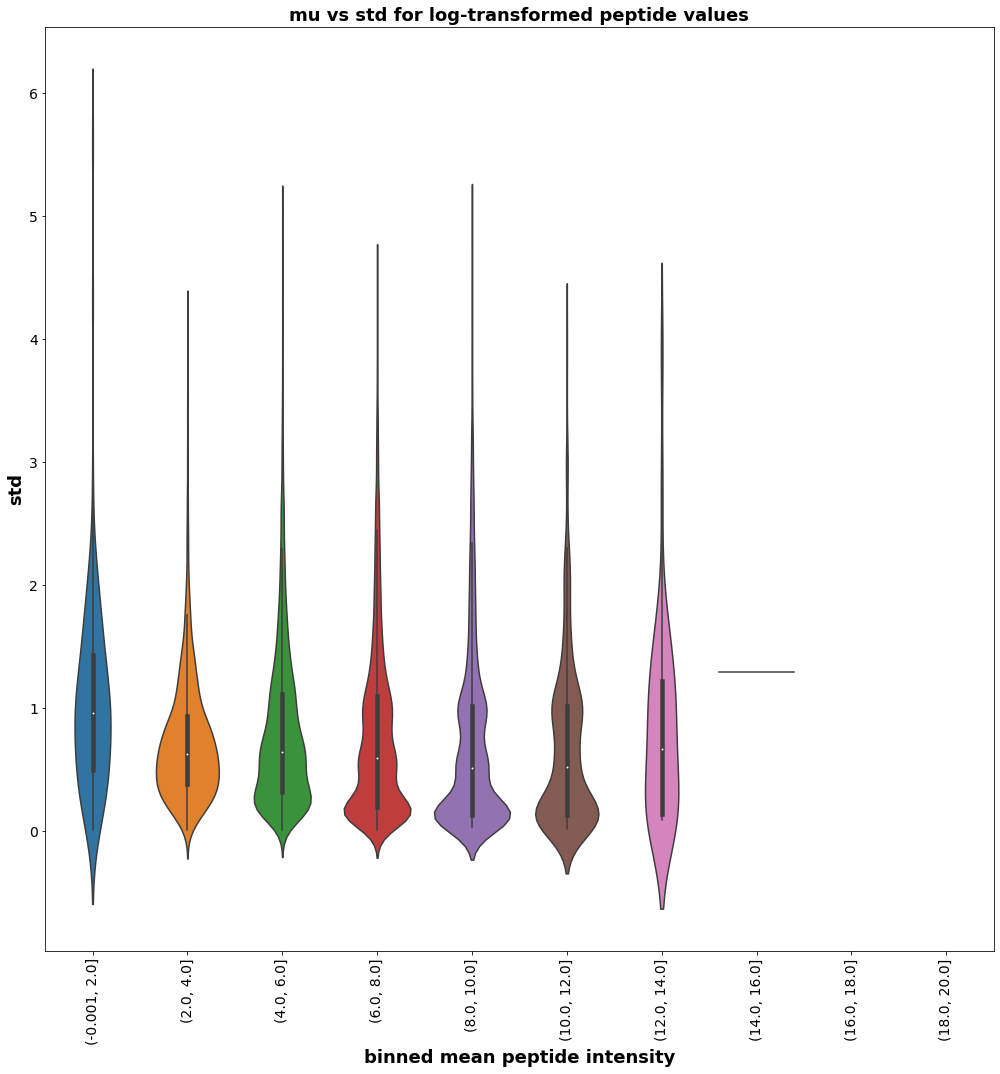

In [346]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats_filtered, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)

# Quantile filtered

In [347]:
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=20, precision = 0)


In [348]:
df_stats["quantile_bin_mu"]

peptide
AAAAAAAAAAGAAGGR                 (9.6, 14.3]
AAAAAAAAAPAAAATAPTTAATTAATAAQ     (8.2, 8.6]
AAAAAAAGDSDSWDADAFSVEDPVRK        (7.5, 7.7]
AAAAAAGAASGLPGPVAQGLK             (9.0, 9.6]
AAAAAATAAAAASIR                   (6.8, 7.1]
                                    ...     
YYTGVVNNNEMVALQR                  (5.3, 5.7]
YYTVFDRDNNR                       (5.3, 5.7]
YYVLNFPAR                         (5.3, 5.7]
YYYIPQYK                          (8.2, 8.6]
YYYKFIKCDADLLESR                  (6.4, 6.6]
Name: quantile_bin_mu, Length: 25054, dtype: category
Categories (20, interval[float64]): [(-0.7, 3.7] < (3.7, 4.5] < (4.5, 5.0] < (5.0, 5.3] ... (8.2, 8.6] < (8.6, 9.0] < (9.0, 9.6] < (9.6, 14.3]]

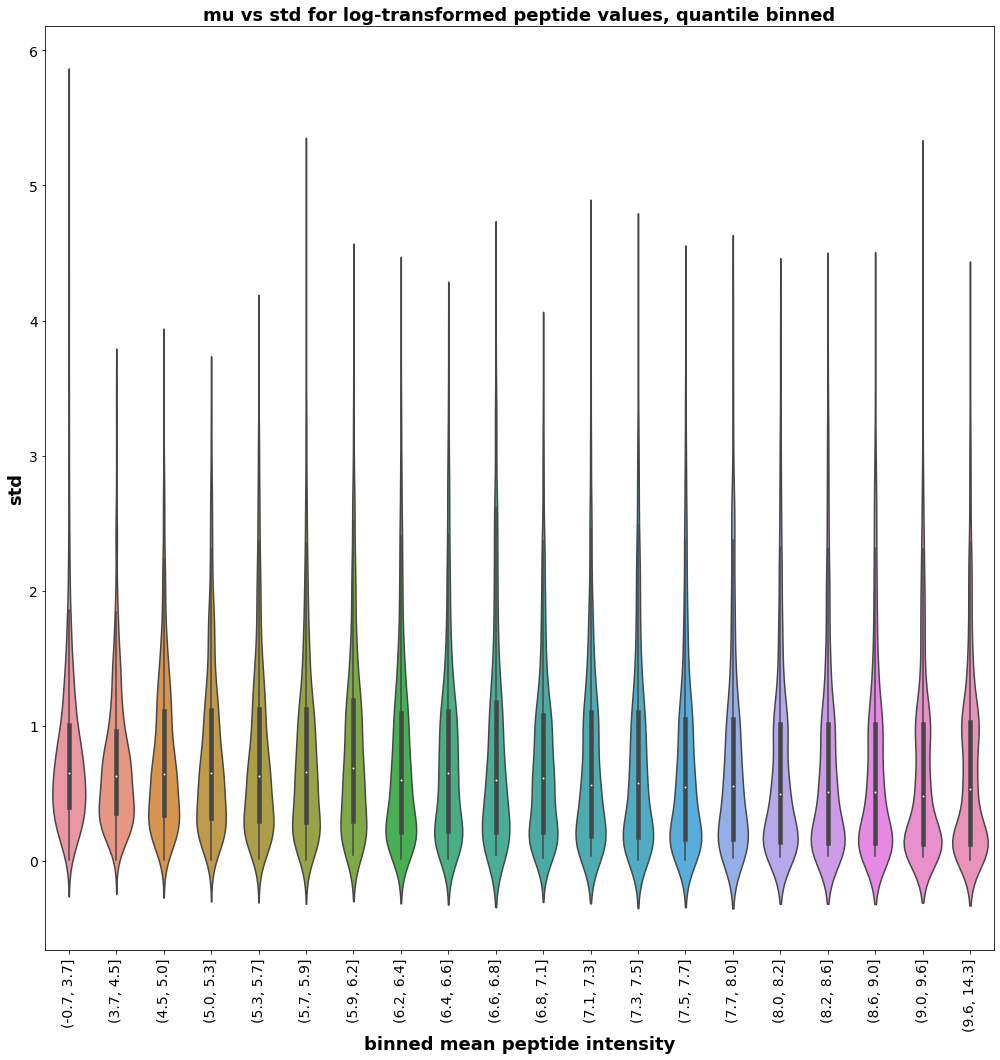

In [349]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values, quantile binned", fontsize = 18, fontweight = "bold")

ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)

In [350]:
df_stats_filtered = df_stats_filtered.dropna()

In [351]:
df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=20, precision=0)

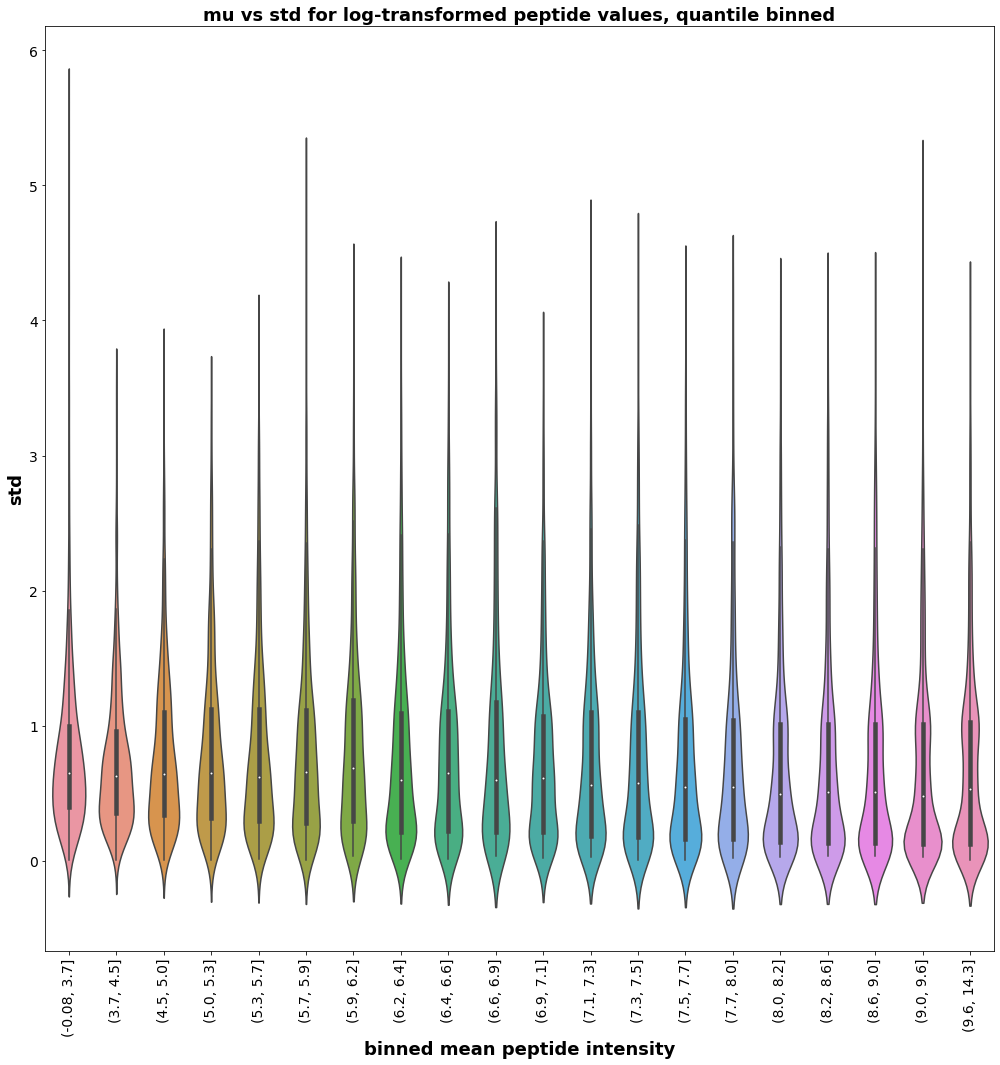

In [352]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats_filtered, ax=ax)
ax.set_title("mu vs std for log-transformed peptide values, quantile binned", fontsize = 18, fontweight = "bold")

ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")

ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(axis='both', which='minor', labelsize=8)
